In [23]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Load dataset
df = pd.read_csv("AirQuality.csv",sep=';')

# Display first few rows to understand dataset structure
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [24]:
# Step 2: Explore the dataset
print("Dataset Head:\n", data.head())
print("\nDataset Info:\n", data.info())

Dataset Head:
          Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110.0  11,2  59,6   

       AH  Unnamed: 15  Unnamed: 16  
0  

In [21]:
# Display unique formats in the Date and Time columns to identify inconsistencies
print("Unique Date values:", df['Date'].unique()[:10])  # Displaying only first 10 for brevity
print("Unique Time values:", df['Time'].unique()[:10])

Unique Date values: ['10/03/2004' '11/03/2004' '12/03/2004' '13/03/2004' '14/03/2004'
 '15/03/2004' '16/03/2004' '17/03/2004' '18/03/2004' '19/03/2004']
Unique Time values: ['18.00.00' '19.00.00' '20.00.00' '21.00.00' '22.00.00' '23.00.00'
 '00.00.00' '01.00.00' '02.00.00' '03.00.00']


In [25]:
# Step 3: Identify relevant variables and clean column names
data.columns = data.columns.str.strip()  # Remove any leading/trailing spaces from column names

In [26]:
# Correct the time format
data['Time'] = data['Time'].str.replace('.', ':', regex=False)  # Ensure replacement is done correctly

In [27]:
# Combine Date and Time into a single datetime column
data['Date'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H:%M:%S', errors='coerce')

In [28]:
# Check for NaT values and print rows with missing dates
missing_dates = data[data['Date'].isna()]
if not missing_dates.empty:
    print("\nRows with missing Date values:\n", missing_dates)


Rows with missing Date values:
      Date Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
9357  NaT  NaN    NaN          NaN       NaN      NaN            NaN      NaN   
9358  NaT  NaN    NaN          NaN       NaN      NaN            NaN      NaN   
9359  NaT  NaN    NaN          NaN       NaN      NaN            NaN      NaN   
9360  NaT  NaN    NaN          NaN       NaN      NaN            NaN      NaN   
9361  NaT  NaN    NaN          NaN       NaN      NaN            NaN      NaN   
...   ...  ...    ...          ...       ...      ...            ...      ...   
9466  NaT  NaN    NaN          NaN       NaN      NaN            NaN      NaN   
9467  NaT  NaN    NaN          NaN       NaN      NaN            NaN      NaN   
9468  NaT  NaN    NaN          NaN       NaN      NaN            NaN      NaN   
9469  NaT  NaN    NaN          NaN       NaN      NaN            NaN      NaN   
9470  NaT  NaN    NaN          NaN       NaN      NaN            NaN      Na

In [29]:
# Drop rows with NaT values in 'Date'
data.dropna(subset=['Date'], inplace=True)

In [30]:
# Step 4: Convert pollutant columns to numeric, forcing errors to NaN
pollutants = ['NO2(GT)', 'CO(GT)', 'NMHC(GT)', 'C6H6(GT)']
for pollutant in pollutants:
    data[pollutant] = pd.to_numeric(data[pollutant], errors='coerce')

In [31]:
# Check for any NaN values in pollutant columns after conversion
print("\nNaN values in pollutant columns after conversion:\n", data[pollutants].isna().sum())


NaN values in pollutant columns after conversion:
 NO2(GT)        0
CO(GT)      7220
NMHC(GT)       0
C6H6(GT)    9357
dtype: int64


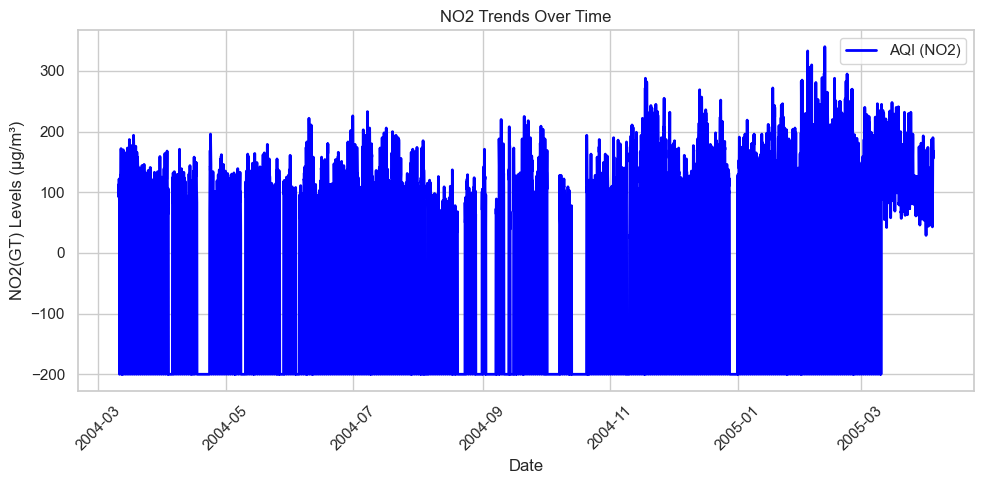

In [32]:
# Step 5: Line plot for overall AQI trend over time
plt.figure(figsize=(10, 5))
plt.plot(data['Date'], data['NO2(GT)'], color='blue', label='AQI (NO2)', linewidth=2)
plt.xlabel("Date")
plt.ylabel("NO2(GT) Levels (µg/m³)")
plt.title("NO2 Trends Over Time")
plt.legend()
plt.xticks(rotation=45)  # Rotate x-ticks for better readability
plt.tight_layout()  # Adjust layout
plt.show()

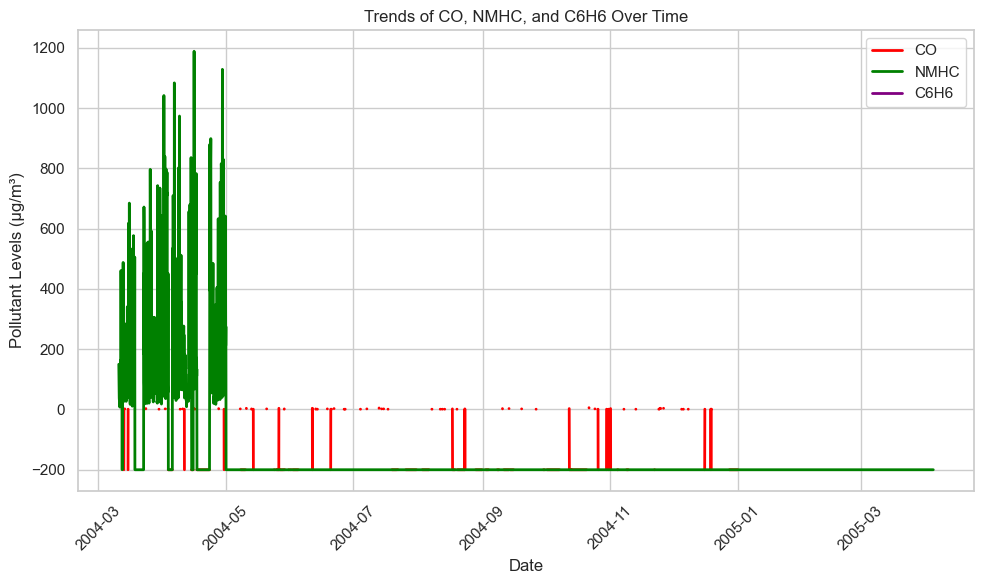

In [33]:
# Step 6: Line plots for individual pollutants
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['CO(GT)'], color='red', label='CO', linewidth=2)
plt.plot(data['Date'], data['NMHC(GT)'], color='green', label='NMHC', linewidth=2)
plt.plot(data['Date'], data['C6H6(GT)'], color='purple', label='C6H6', linewidth=2)
plt.xlabel("Date")
plt.ylabel("Pollutant Levels (µg/m³)")
plt.title("Trends of CO, NMHC, and C6H6 Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

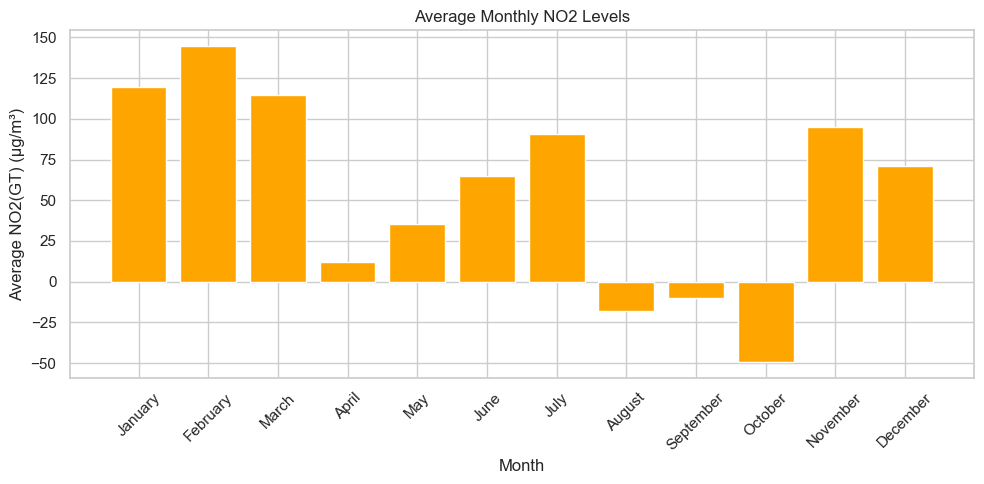

In [34]:
# Step 7: Bar plot for average AQI values by month
data['Month'] = data['Date'].dt.month_name()  # Get month names for better labeling
monthly_aqi = data.groupby('Month')['NO2(GT)'].mean().reindex([
    'January', 'February', 'March', 'April', 'May', 
    'June', 'July', 'August', 'September', 'October', 
    'November', 'December'
])  # Ensure months are in order

plt.figure(figsize=(10, 5))
plt.bar(monthly_aqi.index, monthly_aqi.values, color='orange')
plt.xlabel("Month")
plt.ylabel("Average NO2(GT) (µg/m³)")
plt.title("Average Monthly NO2 Levels")
plt.xticks(rotation=45)  # Rotate month labels for better readability
plt.tight_layout()
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15320\3047686244.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data['CO(GT)'].dropna(), data['NMHC(GT)'].dropna(), data['C6H6(GT)'].dropna()],


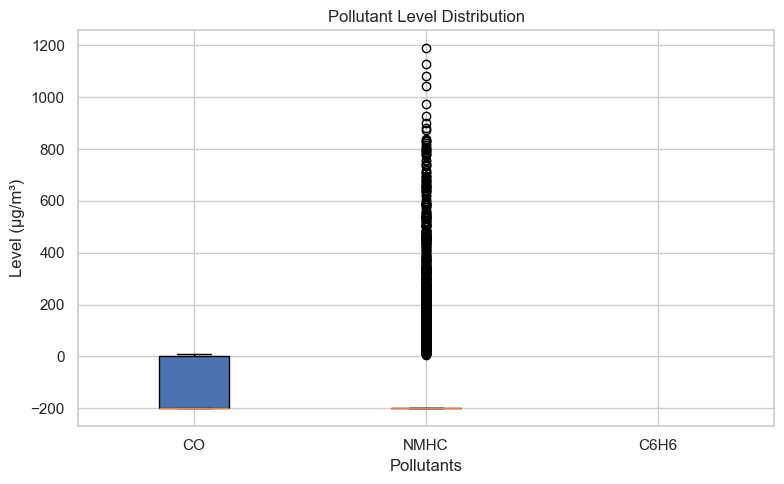

In [35]:
# Step 8: Box plot for pollutant level distribution
plt.figure(figsize=(8, 5))
plt.boxplot([data['CO(GT)'].dropna(), data['NMHC(GT)'].dropna(), data['C6H6(GT)'].dropna()], 
            labels=['CO', 'NMHC', 'C6H6'], 
            patch_artist=True)  # Add color to box plots
plt.xlabel("Pollutants")
plt.ylabel("Level (µg/m³)")
plt.title("Pollutant Level Distribution")
plt.tight_layout()
plt.show()

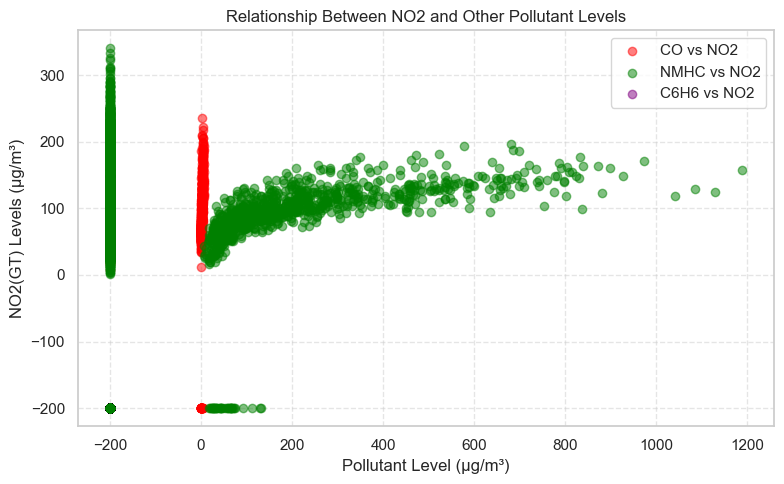

In [36]:
# Step 9: Scatter plot for NO2 vs. Pollutant Levels
plt.figure(figsize=(8, 5))
plt.scatter(data['CO(GT)'], data['NO2(GT)'], color='red', label='CO vs NO2', alpha=0.5)
plt.scatter(data['NMHC(GT)'], data['NO2(GT)'], color='green', label='NMHC vs NO2', alpha=0.5)
plt.scatter(data['C6H6(GT)'], data['NO2(GT)'], color='purple', label='C6H6 vs NO2', alpha=0.5)
plt.xlabel("Pollutant Level (µg/m³)")
plt.ylabel("NO2(GT) Levels (µg/m³)")
plt.title("Relationship Between NO2 and Other Pollutant Levels")
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()